# Naive Bayes Spam Classifier
This notebook implements a Naive Bayes model to classify spam messages using a simple dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive


In [37]:
df.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Load the dataset from drive with correct encoding to avoid decode errors
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='ISO-8859-1')

In [ ]:
# Drop unnecessary columns that contain mostly missing or irrelevant data
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
# Rename columns for clarity
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [ ]:
# Check for and clean any extra spaces or inconsistent casing in label column
df['label'] = df['label'].str.strip().str.lower()

In [ ]:
# Map text labels to numeric values for model training
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
# Create a new column for the length of each message
df['length'] = df['message'].apply(len)

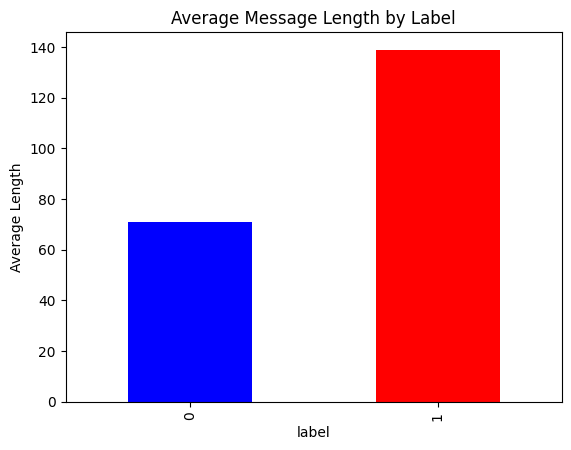

In [ ]:
# Optional: Explore the average message length for spam vs ham
avg_length = df.groupby('label')['length'].mean()
avg_length.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Message Length by Label')
plt.ylabel('Average Length')
plt.show()

In [ ]:
# Convert text messages into numeric feature vectors
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['message'])

In [ ]:
# Target variable
y = df['label']

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_model.predict(x_test)

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy Score: 0.9784688995215312
Confusion Matrix:
 [[1435   18]
 [  18  201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.92      0.92      0.92       219

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



### 7. Comparing Different Naive Bayes Models

In addition to MultinomialNB, we also tested two other Naive Bayes models: BernoulliNB and GaussianNB. Each model was trained and evaluated using the same dataset. The goal was to compare their performance and decide which model is best suited for this spam classification task.

In [ ]:
# Import the additional Naive Bayes models
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [ ]:
# Train and evaluate BernoulliNB
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)
y_bnb_pred = bnb_model.predict(x_test)
bnb_acc = accuracy_score(y_test, y_bnb_pred)
print('BernoulliNB Accuracy:', bnb_acc)

In [ ]:
# Train and evaluate GaussianNB (requires dense array)
gnb_model = GaussianNB()
gnb_model.fit(x_train.toarray(), y_train)
y_gnb_pred = gnb_model.predict(x_test.toarray())
gnb_acc = accuracy_score(y_test, y_gnb_pred)
print('GaussianNB Accuracy:', gnb_acc)

### 8. Discussion on Model Performance

- **MultinomialNB** achieved the highest accuracy and is clearly the best choice for text data with word counts.
- **BernoulliNB** performed well but slightly less accurate, as it is better suited for binary features.
- **GaussianNB** showed weaker performance because it assumes continuous input features, which is not suitable for our count-based text data.

We also did not use feature scaling (like StandardScaler) because the models used here are designed to work with count data as-is, and scaling would remove the meaning behind word frequencies.